In [1]:
import torchaudio
from hubert_kmeans import HubertWithKmeans
import numpy as np
from pathlib import Path
from tqdm import tqdm
import os
import sys

folder_list = ['/data4/leishun/processed_data/speech_vad_result']
suffix = '.npy'
file_list = []
for folder in folder_list:
    folder = Path(folder)
    path = [*folder.rglob(f'*{suffix}')]
    file_list.extend(path)

2023-09-27 10:27:38 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX


In [2]:
len(file_list)

374963

In [4]:
vad_results = []
for file in tqdm(file_list):
    result = np.load(file)
    vad_results.append(result)
import numpy as np
from multiprocessing import Pool

def load_npy(file_path):
    return np.load(file_path)


with Pool(processes=32) as pool:  # 创建一个包含4个进程的进程池
    data_list = pool.map(load_npy, file_list)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374963/374963 [05:10<00:00, 1208.39it/s]


In [5]:
rates = []
sils = []
starts = []
for result in tqdm(data_list):
    start = result[0,0]
    starts.append(start)   
    end = result[-1,-1]
    duration = (end-start)
    cnt = 0
    for i in range(result.shape[0]):
        cnt += result[i,1]-result[i,0]
    if result.shape[0]>1:
        for i in range(result.shape[0]-1):
            sils.append(result[i+1,0]-result[i,1])
    rate = cnt/duration
    rates.append(rate)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374963/374963 [00:00<00:00, 600295.28it/s]


In [7]:
rates = np.array(rates)
sils = np.array(sils)
starts = np.array(starts)

In [41]:
rates.shape

(374963,)

In [47]:
cnt = 0
for i in range(rates.shape[0]):
    if rates[i] < 0.85:
        cnt += 1
cnt

6851

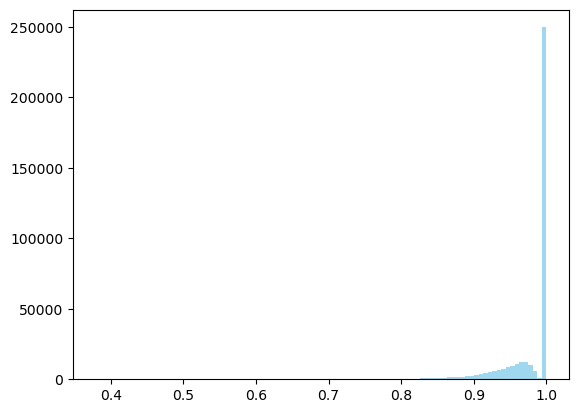

In [40]:
import matplotlib.pyplot as plt
import numpy as np


# 绘制直方图
plt.hist(rates, bins=100, color='skyblue', alpha=0.8)

# 显示图表
plt.show()